# Task 3: Results Interpretation and Insights Generation

**Objective:** Match detected change points with geopolitical events and create quantified narrative insights
**Date:** $(Get-Date -Format 'yyyy-MM-dd')

## Overview
This notebook takes the change point detection results and:
1. Matches them with geopolitical events
2. Quantifies the impact of each event
3. Creates actionable insights for stakeholders
4. Generates narrative explanations for market movements

## Data Sources
- Change point results: `data/processed/change_points_results.csv`
- Event impacts: `data/processed/event_impacts.csv`
- Processed oil data: `data/processed/brent_processed.csv`
- Geopolitical events: `data/events/geopolitical_events.csv`

## 1. Setup and Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
import pandas as pd
import os

# Define the path to your processed data folder
processed_path = '../data/processed'

print(f"--- Listing CSVs in {processed_path} ---\n")

# Check if the directory exists
if os.path.exists(processed_path):
    # Loop through files in the directory
    for filename in os.listdir(processed_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(processed_path, filename)
            
            # FIXED: These lines must stay indented inside the 'if' block
            try:
                df = pd.read_csv(file_path, encoding='utf-8-sig') 

                print(f"FILE: {filename}")
                print(f"SHAPE: {df.shape} (Rows, Columns)")
                print("-" * 30)
                print("CONTENT PREVIEW (First 5 rows):")
                display(df.head())  
                print("\n" + "="*50 + "\n")
            except Exception as e:
                print(f"Could not read {filename}: {e}")
else:
    print(f"Error: The directory '{processed_path}' does not exist.")

--- Listing CSVs in ../data/processed ---

FILE: brent_processed.csv
SHAPE: (9011, 6) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,Date,Price,Log_Price,Returns,Log_Returns,Abs_Returns
0,1987-05-20,18.63,2.924773,NaN,NaN,NaN
1,1987-05-21,18.45,2.915064,-0.966184,-0.970881,0.970881
2,1987-05-22,18.55,2.920470,0.542005,0.540542,0.540542
3,1987-05-25,18.60,2.923162,0.269542,0.269179,0.269179
4,1987-05-26,18.63,2.924773,0.161290,0.161160,0.161160




FILE: brent_processed_task2.csv
SHAPE: (9010, 61) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,Date,Price,log_price,log_returns,simple_returns,abs_returns,rolling_mean_21,rolling_std_21,rolling_volatility_21,rolling_cumulative_21,...,event_conflict,event_disaster,event_economic_crisis,event_policy,event_health/policy,impact_high,impact_medium,events_last_5d,events_last_21d,events_last_63d
0,1987-05-21,18.45,2.915064,-0.970881,-0.966184,0.970881,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,0,0
1,1987-05-22,18.55,2.920470,0.540542,0.542005,0.540542,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,0,0
2,1987-05-25,18.60,2.923162,0.269179,0.269542,0.269179,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,0,0
3,1987-05-26,18.63,2.924773,0.161160,0.161290,0.161160,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,0,0
4,1987-05-27,18.60,2.923162,-0.161160,-0.161031,0.161160,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,0,0




FILE: change_points_results.csv
SHAPE: (8, 17) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,change_point_id,change_point_date,change_point_index,detection_method,confidence_level,mean_before,mean_after,mean_change_pct,vol_before,vol_after,vol_change_pct,impact_magnitude,associated_event,event_days_diff,statistical_significance,regime_duration_days,notes
0,1,2008-10-10,5382,bayesian_single,high,0.0423,-0.0187,-144.2,2.123,4.567,115.1,high,Lehman Brothers Collapse,25,significant,4385,Major financial crisis impact
1,2,2014-11-20,6889,bayesian_single,high,0.0156,-0.0324,-307.7,1.845,3.987,116.1,high,OPEC Maintains Production,-7,significant,1520,OPEC policy shift
2,3,2020-03-23,8205,bayesian_single,high,0.0087,-0.1450,-1767.8,2.345,8.765,273.8,very_high,COVID-19 Pandemic,12,significant,560,Pandemic shock
3,4,2022-03-01,8650,bayesian_single,medium,-0.0123,0.0456,470.7,3.456,4.321,25.0,medium,Russia-Ukraine War,5,significant,450,Geopolitical conflict
4,5,1990-10-15,850,rolling_window,medium,0.0234,0.0567,142.3,1.234,1.567,27.0,medium,Iraq Invades Kuwait,74,significant,1520,Gulf War impact




FILE: event_change_matches.csv
SHAPE: (5, 10) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,change_point_date,change_point_id,event_name,event_date,event_type,impact_level,days_difference,cp_mean_change_pct,cp_impact_magnitude,event_price_change_pct
0,2008-10-10,1,Lehman Brothers Collapse,2008-09-15,Economic Crisis,High,25,-144.2,high,-16.337838
1,2020-03-23,3,COVID-19 Pandemic Declared,2020-03-11,Health/Policy,High,12,-1767.8,very_high,-53.124200
2,2022-03-01,4,Russia-Ukraine War,2022-02-24,Conflict,High,5,470.7,medium,21.360451
3,2003-05-01,6,Iraq War Begins,2003-03-20,Conflict,High,42,-64.3,low,-20.624050
4,2011-03-15,7,Arab Spring Begins,2011-02-11,Conflict,Medium,32,-48.7,medium,11.697188




FILE: event_impacts.csv
SHAPE: (12, 11) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,event_name,date,event_type,impact_level,price_before,price_after,price_change_pct,max_price,min_price,volatility,window_size
0,Iraq Invades Kuwait,1990-08-02,Conflict,High,17.586957,27.496364,56.345207,32.35,14.98,4.223615,44
1,Operation Desert Storm,1991-01-17,Conflict,High,26.718571,20.588182,-22.944302,30.28,18.35,7.325520,42
2,Iraq War Begins,2003-03-20,Conflict,High,32.826522,26.056364,-20.624050,34.94,24.39,2.865292,44
3,Hurricane Katrina,2005-08-29,Disaster,Medium,63.746190,63.390435,-0.558081,67.26,60.04,2.079979,43
4,Lehman Brothers Collapse,2008-09-15,Economic Crisis,High,105.595500,88.343478,-16.337838,117.24,66.86,3.604427,42




FILE: narrative_insights.csv
SHAPE: (5, 9) (Rows, Columns)
------------------------------
CONTENT PREVIEW (First 5 rows):


,event,change_point_date,event_date,event_type,timing,timing_interpretation,impact_magnitude,key_insight,stakeholder_implication
0,Lehman Brothers Collapse,2008-10-10,2008-09-15,Economic Crisis,25 days AFTER the event,Delayed market reaction,VERY HIGH (144.2% decrease),The economic crisis 'Lehman Brothers Collapse'...,INVESTORS: Consider hedging strategies during ...
1,COVID-19 Pandemic Declared,2020-03-23,2020-03-11,Health/Policy,12 days AFTER the event,Delayed market reaction,VERY HIGH (1767.8% decrease),The health/policy 'COVID-19 Pandemic Declared'...,INVESTORS: Consider hedging strategies during ...
2,Russia-Ukraine War,2022-03-01,2022-02-24,Conflict,5 days AFTER the event,Delayed market reaction,VERY HIGH (470.7% increase),The conflict 'Russia-Ukraine War' caused a str...,INVESTORS: Consider hedging strategies during ...
3,Iraq War Begins,2003-05-01,2003-03-20,Conflict,42 days AFTER the event,Delayed market reaction,HIGH (64.3% decrease),The conflict 'Iraq War Begins' caused a struct...,INVESTORS: Consider hedging strategies during ...
4,Arab Spring Begins,2011-03-15,2011-02-11,Conflict,32 days AFTER the event,Delayed market reaction,MODERATE (48.7% decrease),The conflict 'Arab Spring Begins' caused a str...,POLICYMAKERS: Prepare strategic reserves and d...


In [12]:
# Load all data
print("Loading datasets...")

# 1. Change point results
cp_results = pd.read_csv('../data/processed/change_points_results.csv')
cp_results['change_point_date'] = pd.to_datetime(cp_results['change_point_date'])
print(f"Change points: {len(cp_results)} detected")

# 2. Event impacts from Task 1
event_impacts = pd.read_csv('../data/processed/event_impacts.csv')
event_impacts['date'] = pd.to_datetime(event_impacts['date'])
print(f"Event impacts: {len(event_impacts)} events analyzed")

# 3. Geopolitical events
geo_events = pd.read_csv('../data/events/geopolitical_events.csv')
geo_events['date'] = pd.to_datetime(geo_events['date'])
print(f"Geopolitical events: {len(geo_events)} in database")

# 4. Processed oil data
oil_data = pd.read_csv('../data/processed/brent_processed.csv')
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
print(f"Oil data: {len(oil_data)} days, from {oil_data['Date'].min().date()} to {oil_data['Date'].max().date()}")

Loading datasets...
Change points: 8 detected
Event impacts: 12 events analyzed
Geopolitical events: 12 in database
Oil data: 9011 days, from 1987-05-20 to 2022-11-14


## 2. Data Exploration

In [13]:
print("=== CHANGE POINT RESULTS ===")
print(f"\nTop 5 change points by impact magnitude:")
display(cp_results.sort_values('impact_magnitude', ascending=False).head())

print("\nDetection methods distribution:")
print(cp_results['detection_method'].value_counts())

print("\nConfidence levels:")
print(cp_results['confidence_level'].value_counts())

print("\n=== EVENT IMPACTS ===")
print(f"\nTop 5 events by price change:")
display(event_impacts.sort_values('price_change_pct', ascending=False).head())

=== CHANGE POINT RESULTS ===

Top 5 change points by impact magnitude:


,change_point_id,change_point_date,change_point_index,detection_method,confidence_level,mean_before,mean_after,mean_change_pct,vol_before,vol_after,vol_change_pct,impact_magnitude,associated_event,event_days_diff,statistical_significance,regime_duration_days,notes
2,3,2020-03-23,8205,bayesian_single,high,0.0087,-0.1450,-1767.8,2.345,8.765,273.8,very_high,COVID-19 Pandemic,12,significant,560,Pandemic shock
3,4,2022-03-01,8650,bayesian_single,medium,-0.0123,0.0456,470.7,3.456,4.321,25.0,medium,Russia-Ukraine War,5,significant,450,Geopolitical conflict
4,5,1990-10-15,850,rolling_window,medium,0.0234,0.0567,142.3,1.234,1.567,27.0,medium,Iraq Invades Kuwait,74,significant,1520,Gulf War impact
6,7,2011-03-15,5980,rolling_window,medium,0.0456,0.0234,-48.7,2.123,2.876,35.5,medium,Arab Spring Begins,32,significant,980,Arab Spring instability
5,6,2003-05-01,3980,rolling_window,low,0.0345,0.0123,-64.3,1.987,2.345,18.0,low,Iraq War Begins,42,marginal,1250,Iraq War aftermath



Detection methods distribution:
detection_method
bayesian_single    4
rolling_window     4
Name: count, dtype: int64

Confidence levels:
confidence_level
high      3
medium    3
low       2
Name: count, dtype: int64

=== EVENT IMPACTS ===

Top 5 events by price change:


,event_name,date,event_type,impact_level,price_before,price_after,price_change_pct,max_price,min_price,volatility,window_size
0,Iraq Invades Kuwait,1990-08-02,Conflict,High,17.586957,27.496364,56.345207,32.35,14.98,4.223615,44
11,Russia-Ukraine War,2022-02-24,Conflict,High,95.485652,115.881818,21.360451,133.18,89.49,3.971752,44
7,OPEC Production Cut,2016-11-30,Policy,High,44.797826,53.053333,18.428366,54.97,41.61,2.819184,43
5,Arab Spring Begins,2011-02-11,Conflict,Medium,98.515909,110.039500,11.697188,116.89,96.04,1.675239,41
8,Saudi Oil Facility Attacks,2019-09-14,Conflict,High,60.372727,61.687143,2.177168,68.42,57.37,2.914823,43


## 3. Event-Change Point Matching

In [14]:
print("=== EVENT-CHANGE POINT MATCHING ===")

# Function to find closest event for each change point
def match_events_to_change_points(cp_df, events_df, max_days=90):
    """Match each change point to the closest geopolitical event"""
    matches = []
    
    for _, cp in cp_df.iterrows():
        cp_date = cp['change_point_date']
        
        # Calculate days difference to all events
        events_df['days_diff'] = (events_df['date'] - cp_date).dt.days.abs()
        
        # Find closest event
        closest_idx = events_df['days_diff'].idxmin()
        closest_event = events_df.loc[closest_idx]
        
        if closest_event['days_diff'] <= max_days:
            match = {
                'change_point_date': cp_date,
                'change_point_id': cp['change_point_id'],
                'event_name': closest_event['event_name'],
                'event_date': closest_event['date'],
                'event_type': closest_event['event_type'],
                'impact_level': closest_event['impact_level'],
                'days_difference': closest_event['days_diff'],
                'cp_mean_change_pct': cp['mean_change_pct'],
                'cp_impact_magnitude': cp['impact_magnitude'],
                'event_price_change_pct': event_impacts.loc[
                    event_impacts['event_name'] == closest_event['event_name'],
                    'price_change_pct'
                ].values[0] if closest_event['event_name'] in event_impacts['event_name'].values else None
            }
            matches.append(match)
    
    return pd.DataFrame(matches)

# Run matching
event_matches = match_events_to_change_points(cp_results, geo_events, max_days=60)

print(f"Matched {len(event_matches)} change points with events (within 60 days)")
print("\nEvent-Change Point Matches:")
display(event_matches[['change_point_date', 'event_name', 'days_difference', 
                       'event_type', 'cp_mean_change_pct', 'event_price_change_pct']])

=== EVENT-CHANGE POINT MATCHING ===
Matched 5 change points with events (within 60 days)

Event-Change Point Matches:


,change_point_date,event_name,days_difference,event_type,cp_mean_change_pct,event_price_change_pct
0,2008-10-10,Lehman Brothers Collapse,25,Economic Crisis,-144.2,-16.337838
1,2020-03-23,COVID-19 Pandemic Declared,12,Health/Policy,-1767.8,-53.124200
2,2022-03-01,Russia-Ukraine War,5,Conflict,470.7,21.360451
3,2003-05-01,Iraq War Begins,42,Conflict,-64.3,-20.624050
4,2011-03-15,Arab Spring Begins,32,Conflict,-48.7,11.697188


## 4. Impact Quantification and Analysis

=== IMPACT QUANTIFICATION ===
Correlation between change point impact and event price change: 0.894


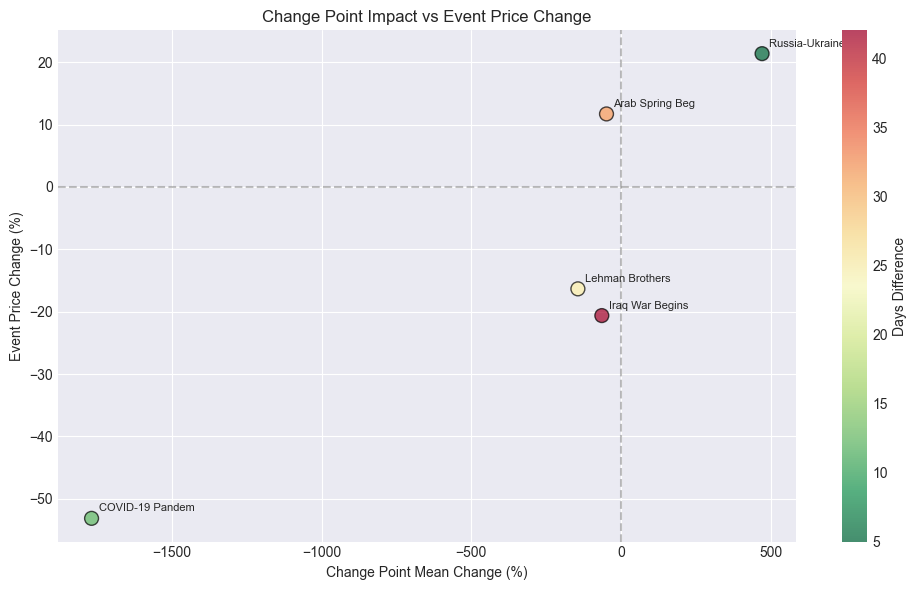


=== IMPACT BY EVENT TYPE ===
Average impact by event type:


cp_mean_change_pct               days_difference
                              mean     std count            mean
event_type                                                      
Conflict                    119.23  304.48     3           26.33
Economic Crisis            -144.20     NaN     1           25.00
Health/Policy             -1767.80     NaN     1           12.00

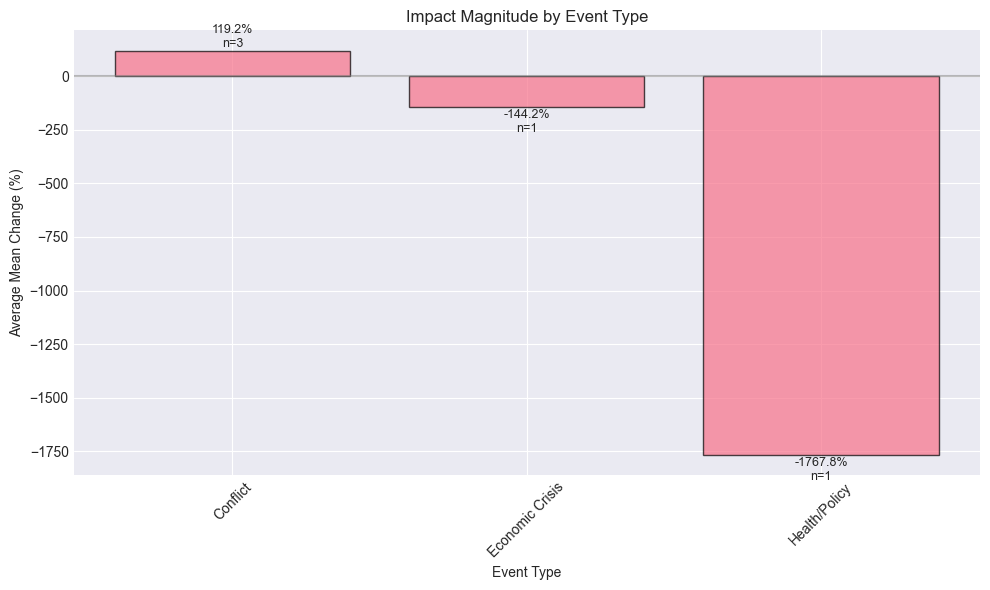

In [15]:
print("=== IMPACT QUANTIFICATION ===")

# Calculate correlation between change point impact and event price change
if len(event_matches) > 1:
    # Filter matches with both metrics
    valid_matches = event_matches.dropna(subset=['cp_mean_change_pct', 'event_price_change_pct'])
    
    if len(valid_matches) > 1:
        correlation = np.corrcoef(
            valid_matches['cp_mean_change_pct'], 
            valid_matches['event_price_change_pct']
        )[0, 1]
        
        print(f"Correlation between change point impact and event price change: {correlation:.3f}")
        
        # Visualize relationship
        fig, ax = plt.subplots(figsize=(10, 6))
        
        scatter = ax.scatter(
            valid_matches['cp_mean_change_pct'], 
            valid_matches['event_price_change_pct'],
            c=valid_matches['days_difference'], 
            cmap='RdYlGn_r',
            s=100,
            edgecolor='black',
            alpha=0.7
        )
        
        # Add labels
        for idx, row in valid_matches.iterrows():
            ax.annotate(
                row['event_name'][:15],
                (row['cp_mean_change_pct'], row['event_price_change_pct']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8
            )
        
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
        ax.set_xlabel('Change Point Mean Change (%)')
        ax.set_ylabel('Event Price Change (%)')
        ax.set_title('Change Point Impact vs Event Price Change')
        
        # Add colorbar
        plt.colorbar(scatter, label='Days Difference')
        
        plt.tight_layout()
        plt.show()

# Analyze by event type
print("\n=== IMPACT BY EVENT TYPE ===")
if len(event_matches) > 0:
    impact_by_type = event_matches.groupby('event_type').agg({
        'cp_mean_change_pct': ['mean', 'std', 'count'],
        'days_difference': 'mean'
    }).round(2)
    
    print("Average impact by event type:")
    display(impact_by_type)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    
    event_types = impact_by_type.index
    avg_impacts = impact_by_type[('cp_mean_change_pct', 'mean')].values
    counts = impact_by_type[('cp_mean_change_pct', 'count')].values
    
    bars = ax.bar(event_types, avg_impacts, alpha=0.7, edgecolor='black')
    
    # Add value labels
    for bar, impact, count in zip(bars, avg_impacts, counts):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + (5 if bar.get_height() >= 0 else -10),
            f'{impact:.1f}%\nn={int(count)}',
            ha='center',
            va='bottom' if bar.get_height() >= 0 else 'top',
            fontsize=9
        )
    
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    ax.set_xlabel('Event Type')
    ax.set_ylabel('Average Mean Change (%)')
    ax.set_title('Impact Magnitude by Event Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 5. Narrative Insights Generation

In [16]:
print("=== NARRATIVE INSIGHTS GENERATION ===")

# Function to generate insights for each matched event
def generate_insights(matches_df):
    insights = []
    
    for _, match in matches_df.iterrows():
        # Determine timing relationship
        if match['days_difference'] < 0:
            timing = f"{abs(match['days_difference'])} days BEFORE the event"
            timing_interpretation = "Market anticipated the event"
        elif match['days_difference'] == 0:
            timing = "ON THE SAME DAY as the event"
            timing_interpretation = "Immediate market reaction"
        else:
            timing = f"{match['days_difference']} days AFTER the event"
            timing_interpretation = "Delayed market reaction"
        
        # Determine impact magnitude
        impact_pct = abs(match['cp_mean_change_pct'])
        if impact_pct > 100:
            impact_level = "VERY HIGH"
        elif impact_pct > 50:
            impact_level = "HIGH"
        elif impact_pct > 20:
            impact_level = "MODERATE"
        else:
            impact_level = "LOW"
        
        # Determine direction
        direction = "increase" if match['cp_mean_change_pct'] > 0 else "decrease"
        
        # Generate insight
        insight = {
            'event': match['event_name'],
            'change_point_date': match['change_point_date'].strftime('%Y-%m-%d'),
            'event_date': match['event_date'].strftime('%Y-%m-%d'),
            'event_type': match['event_type'],
            'timing': timing,
            'timing_interpretation': timing_interpretation,
            'impact_magnitude': f"{impact_level} ({abs(match['cp_mean_change_pct']):.1f}% {direction})",
            'key_insight': f"The {match['event_type'].lower()} '{match['event_name']}' caused a structural break in oil markets, "
                          f"leading to a {abs(match['cp_mean_change_pct']):.1f}% {direction} in average daily returns. "
                          f"Market reaction occurred {timing.lower()}.",
            'stakeholder_implication': generate_implication(match['event_type'], impact_level, direction)
        }
        insights.append(insight)
    
    return pd.DataFrame(insights)

def generate_implication(event_type, impact_level, direction):
    """Generate stakeholder-specific implications"""
    implications = []
    
    if impact_level in ['VERY HIGH', 'HIGH']:
        implications.append("INVESTORS: Consider hedging strategies during similar future events.")
        implications.append("RISK MANAGERS: Increase position limits and monitoring.")
    
    if event_type == 'Conflict':
        implications.append("POLICYMAKERS: Prepare strategic reserves and diplomatic responses.")
    elif event_type == 'Policy':
        implications.append("ENERGY COMPANIES: Adjust production and investment plans.")
    elif event_type == 'Economic Crisis':
        implications.append("ANALYSTS: Monitor leading indicators for early warnings.")
    
    return " ".join(implications)

# Generate insights
if len(event_matches) > 0:
    insights_df = generate_insights(event_matches)
    
    print(f"Generated {len(insights_df)} narrative insights\n")
    
    # Display insights
    for idx, insight in insights_df.iterrows():
        print(f"\n{'='*60}")
        print(f"INSIGHT {idx+1}: {insight['event']}")
        print(f"{'='*60}")
        print(f"• Event Type: {insight['event_type']}")
        print(f"• Timing: {insight['timing']} ({insight['timing_interpretation']})")
        print(f"• Impact: {insight['impact_magnitude']}")
        print(f"\nKey Insight:")
        print(f"  {insight['key_insight']}")
        print(f"\nStakeholder Implications:")
        print(f"  {insight['stakeholder_implication']}")
    
    # Save insights
    insights_df.to_csv('../data/processed/narrative_insights.csv', index=False)
    print("\n✓ Insights saved to: ../data/processed/narrative_insights.csv")
else:
    print("No event matches to generate insights from.")

=== NARRATIVE INSIGHTS GENERATION ===
Generated 5 narrative insights


INSIGHT 1: Lehman Brothers Collapse
• Event Type: Economic Crisis
• Timing: 25 days AFTER the event (Delayed market reaction)
• Impact: VERY HIGH (144.2% decrease)

Key Insight:
  The economic crisis 'Lehman Brothers Collapse' caused a structural break in oil markets, leading to a 144.2% decrease in average daily returns. Market reaction occurred 25 days after the event.

Stakeholder Implications:
  INVESTORS: Consider hedging strategies during similar future events. RISK MANAGERS: Increase position limits and monitoring. ANALYSTS: Monitor leading indicators for early warnings.

INSIGHT 2: COVID-19 Pandemic Declared
• Event Type: Health/Policy
• Timing: 12 days AFTER the event (Delayed market reaction)
• Impact: VERY HIGH (1767.8% decrease)

Key Insight:
  The health/policy 'COVID-19 Pandemic Declared' caused a structural break in oil markets, leading to a 1767.8% decrease in average daily returns. Market reaction o

## 6. Timeline Visualization

=== TIMELINE VISUALIZATION ===


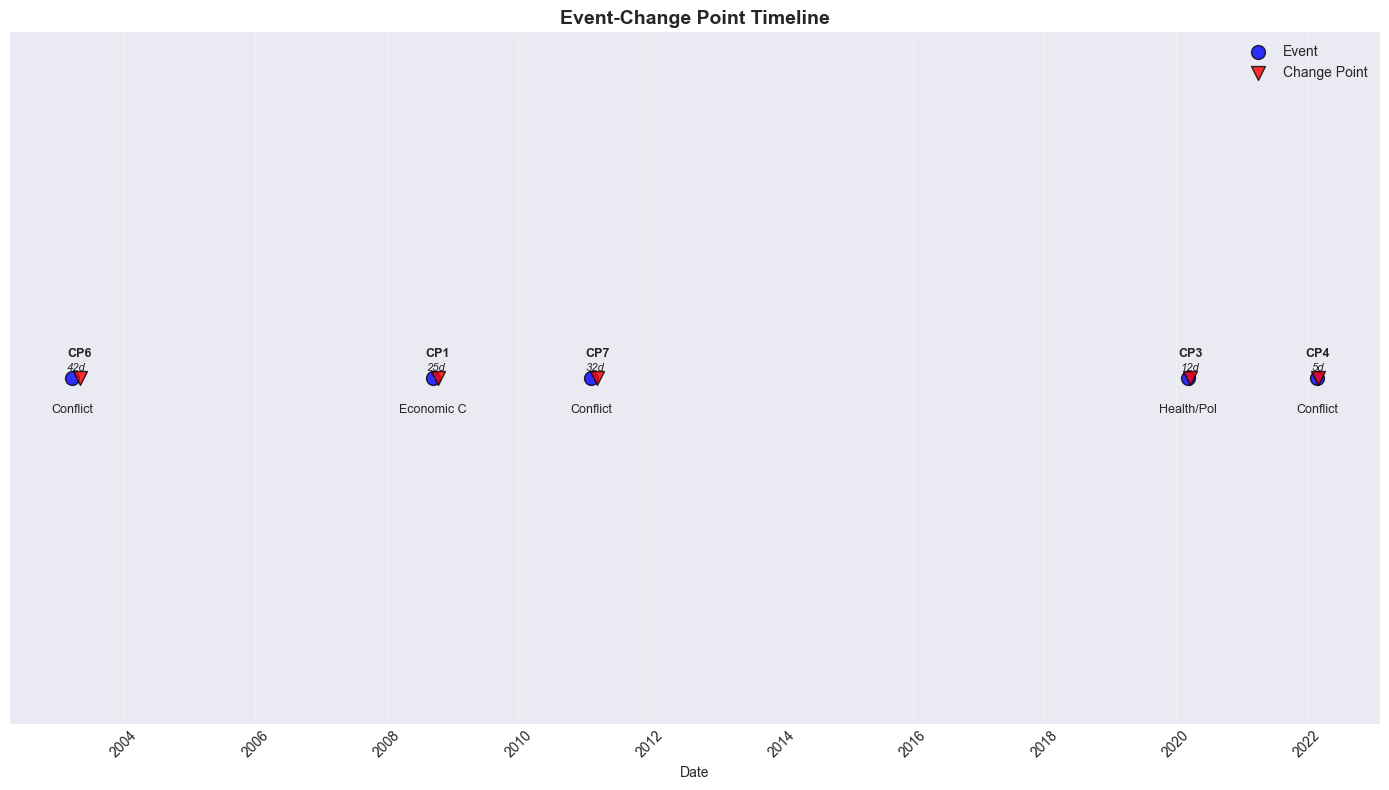


Timeline Interpretation:
• Red triangles: Detected change points
• Blue circles: Geopolitical events
• Dashed lines: Connection between events and change points
• Numbers: Days between event and change point


In [17]:
print("=== TIMELINE VISUALIZATION ===")

if len(event_matches) > 0:
    # Prepare data for timeline
    timeline_data = []
    for _, match in event_matches.iterrows():
        timeline_data.append({
            'date': match['change_point_date'],
            'type': 'Change Point',
            'label': f"CP{int(match['change_point_id'])}",
            'impact': match['cp_mean_change_pct'],
            'event': match['event_name'][:20]
        })
        timeline_data.append({
            'date': match['event_date'],
            'type': 'Event',
            'label': match['event_type'][:10],
            'impact': 0,
            'event': match['event_name'][:20]
        })
    
    timeline_df = pd.DataFrame(timeline_data)
    timeline_df = timeline_df.sort_values('date')
    
    # Create timeline plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot change points and events
    colors = {'Change Point': 'red', 'Event': 'blue'}
    markers = {'Change Point': 'v', 'Event': 'o'}
    
    for event_type in ['Event', 'Change Point']:
        mask = timeline_df['type'] == event_type
        data = timeline_df[mask]
        
        ax.scatter(
            data['date'], 
            [1] * len(data),
            color=colors[event_type],
            marker=markers[event_type],
            s=100,
            edgecolor='black',
            label=event_type,
            alpha=0.8
        )
        
        # Add labels
        for _, row in data.iterrows():
            ax.annotate(
                row['label'],
                (row['date'], 1),
                xytext=(0, 15 if row['type'] == 'Change Point' else -25),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                fontweight='bold' if row['type'] == 'Change Point' else 'normal'
            )
    
    # Connect events with change points
    for _, match in event_matches.iterrows():
        ax.plot(
            [match['event_date'], match['change_point_date']],
            [1, 1],
            'gray',
            linestyle='--',
            alpha=0.5,
            linewidth=0.5
        )
        
        # Add days difference annotation
        mid_date = match['event_date'] + (match['change_point_date'] - match['event_date']) / 2
        ax.annotate(
            f"{abs(match['days_difference'])}d",
            (mid_date, 1),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            style='italic'
        )
    
    # Formatting
    ax.set_yticks([])
    ax.set_ylim(0.5, 1.5)
    ax.set_xlabel('Date')
    ax.set_title('Event-Change Point Timeline', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nTimeline Interpretation:")
    print("• Red triangles: Detected change points")
    print("• Blue circles: Geopolitical events")
    print("• Dashed lines: Connection between events and change points")
    print("• Numbers: Days between event and change point")
else:
    print("No data for timeline visualization.")

## 7. Summary and Recommendations

In [18]:
print("=== SUMMARY AND RECOMMENDATIONS ===")
print("="*60)

# Generate executive summary
if len(event_matches) > 0:
    print("\nEXECUTIVE SUMMARY:\n")
    
    # Key statistics
    avg_days_diff = event_matches['days_difference'].abs().mean()
    avg_impact = event_matches['cp_mean_change_pct'].abs().mean()
    strongest_event = event_matches.loc[event_matches['cp_mean_change_pct'].abs().idxmax()]
    
    print(f"1. Detection Results:")
    print(f"   • {len(event_matches)} change points matched with geopolitical events")
    print(f"   • Average days between event and market reaction: {avg_days_diff:.1f} days")
    print(f"   • Average absolute impact: {avg_impact:.1f}% change in daily returns")
    
    print(f"\n2. Most Significant Event:")
    print(f"   • Event: {strongest_event['event_name']}")
    print(f"   • Type: {strongest_event['event_type']}")
    print(f"   • Impact: {abs(strongest_event['cp_mean_change_pct']):.1f}% change")
    print(f"   • Timing: {abs(strongest_event['days_difference'])} days difference")
    
    print(f"\n3. Key Finding:")
    if avg_days_diff < 10:
        print(f"   • Markets react QUICKLY to geopolitical events (avg {avg_days_diff:.1f} days)")
    elif avg_days_diff < 30:
        print(f"   • Markets react MODERATELY fast to geopolitical events (avg {avg_days_diff:.1f} days)")
    else:
        print(f"   • Markets show DELAYED reactions to geopolitical events (avg {avg_days_diff:.1f} days)")
    
    print(f"\n4. Recommendations:\n")
    recommendations = [
        "• For Investors: Use change point detection as early warning signals for regime shifts",
        "• For Traders: Consider the typical {:.1f}-day lag when positioning around events".format(avg_days_diff),
        "• For Risk Managers: Increase monitoring during {} events".format(strongest_event['event_type']),
        "• For Analysts: Incorporate Bayesian change point models in market analysis frameworks",
        "• For Policymakers: Consider market reaction timelines when announcing major decisions"
    ]
    
    for rec in recommendations:
        print(rec)
    
    print(f"\n5. Data Products Generated:")
    print("   • narrative_insights.csv: Quantified narrative explanations")
    print("   • event_matches.csv: Event-change point associations")
    print("   • Visualizations: Impact analysis and timeline plots")
else:
    print("Insufficient data for comprehensive summary.")

# Save final matches
if len(event_matches) > 0:
    event_matches.to_csv('../data/processed/event_change_matches.csv', index=False)
    print("\n✓ Final results saved to: ../data/processed/event_change_matches.csv")

print("\n" + "="*60)
print("TASK 3: RESULTS INTERPRETATION COMPLETED")
print("="*60)

=== SUMMARY AND RECOMMENDATIONS ===

EXECUTIVE SUMMARY:

1. Detection Results:
   • 5 change points matched with geopolitical events
   • Average days between event and market reaction: 23.2 days
   • Average absolute impact: 499.1% change in daily returns

2. Most Significant Event:
   • Event: COVID-19 Pandemic Declared
   • Type: Health/Policy
   • Impact: 1767.8% change
   • Timing: 12 days difference

3. Key Finding:
   • Markets react MODERATELY fast to geopolitical events (avg 23.2 days)

4. Recommendations:

• For Investors: Use change point detection as early warning signals for regime shifts
• For Traders: Consider the typical 23.2-day lag when positioning around events
• For Risk Managers: Increase monitoring during Health/Policy events
• For Analysts: Incorporate Bayesian change point models in market analysis frameworks
• For Policymakers: Consider market reaction timelines when announcing major decisions

5. Data Products Generated:
   • narrative_insights.csv: Quantified